In [1]:
import sympy as sym

In [13]:
F , L, EI, n = sym.symbols('F L EI n')

F = sym.S(8)

L = sym.S(4)

M_D_inf = F * L * 5 / 32
M_B_inf = -F * L * 3 / 16
M_D_0 = F * L / 4
M_B_0 = sym.S(0)

display(M_D_inf, M_B_inf, M_D_0, M_B_0)
display(M_D_inf.evalf(), M_B_inf.evalf(), M_D_0.evalf(), M_B_0.evalf())

5

-6

8

0

5.00000000000000

-6.00000000000000

8.00000000000000

0

In [30]:
M_B = sym.symbols('M_B')

n = sym.symbols('n')

phi_B_AB = M_B * 4 / 3 / EI + F * L**2 / EI / 16
phi_B_BC = - M_B * 4 / 3 / EI / n

display(phi_B_AB, phi_B_BC)

eq = sym.Eq(phi_B_AB , phi_B_BC)

sol = sym.solve(eq, M_B)[0]
display(sol)

M_B_inf_2 = sym.limit(sol, n, sym.oo)
display(M_B_inf_2)
M_B_0_2 = sol.subs(n, 0)
display(M_B_0_2)

M_D = sol / 2 + F * L / 4
display(M_D)
M_D_inf_2 = sym.limit(M_D, n, sym.oo)
display(M_D_inf_2)
M_D_0_2 = M_D.subs(n, 0)
display(M_D_0_2)

4*M_B/(3*EI) + 8/EI

-4*M_B/(3*EI*n)

-6*n/(n + 1)

-6

0

-3*n/(n + 1) + 8

5

8

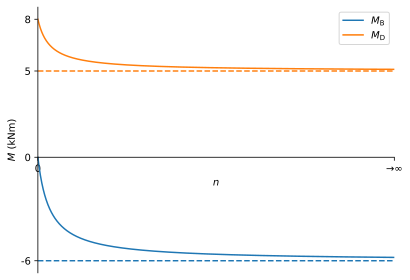

In [ ]:
import numpy as np
%config InlineBackend.figure_formats = ['svg']
n_max = 30
n_eval = np.linspace(0, n_max, 1000)
M_B = sym.lambdify(n, sol)
M_C = sym.lambdify(n, M_D)

import matplotlib.pyplot as plt
plt.plot(n_eval, M_B(n_eval), label=r'$M_{\rm{B}}$')
# get color of last line
line = plt.gca().lines[-1]
color = line.get_color()
plt.plot([0, n_max], [M_B_inf_2,M_B_inf_2], '--',color=color)

plt.plot(n_eval, M_C(n_eval), label=r'$M_{\rm{D}}$')
line = plt.gca().lines[-1]
color = line.get_color()
plt.plot([0, n_max], [M_D_inf_2,M_D_inf_2], '--',color=color)
plt.xlim([0,n_max])
plt.xlabel('$n$')
plt.ylabel(r'$M \ \rm{(kNm)}$')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# add yticks at 3/16 and -3/16+1/4
plt.yticks([-6,0,5,8],('-6', '0', '5', '8'))
plt.xticks([0, n_max], ['0', '$ →  \infty$'])
plt.legend();

#plt.gcf().patch.set_alpha(0)
#ax.set_facecolor('none')
plt.savefig('steunpuntszetting.svg', transparent=True, bbox_inches='tight')